# Preprocessing

In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import os.path
import glob
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, normalize
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif


In [3]:
pd.options.mode.chained_assignment = None

In [7]:
# Enter file path
filepath = "../dataset/complete_dataset.csv"
dataset = pd.read_csv(filepath, index_col=None, header=0, low_memory=False)

In [8]:
dataset.shape

(255258469, 23)

In [9]:
dataset.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'ORIGIN_AIRPORT_SEQ_ID',
       'ORIGIN_CITY_MARKET_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID',
       'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW',
       'DEP_DEL15', 'CANCELLED', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'],
      dtype='object')

In [10]:
dataset = dataset.drop_duplicates()
dataset.shape

(136808564, 23)

## Drop columns with string values (already has their id counterpart)

In [11]:
df = dataset.drop(columns=['DEP_DELAY_NEW', 
                                'OP_CARRIER',
                                'DEST',
                                'DEP_DELAY',
                               ])
df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'OP_CARRIER_AIRLINE_ID', 'ORIGIN_AIRPORT_SEQ_ID',
       'ORIGIN_CITY_MARKET_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DEL15', 'CANCELLED', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'],
      dtype='object')

## Extract only delayed or on-time row

In [12]:
dataset_no_na = df[df['DEP_DEL15'].notna()]
dataset_no_na.shape

(136808564, 19)

## Fill in all delay types time nan values with 0

In [13]:
delay_types = [
    'CARRIER_DELAY', 
    'WEATHER_DELAY', 
    'NAS_DELAY', 
    'SECURITY_DELAY', 
    'LATE_AIRCRAFT_DELAY'
]

In [14]:
dataset_no_na[delay_types] = dataset_no_na[delay_types].fillna(0)

In [15]:
for col in delay_types:
    dataset_no_na.loc[dataset_no_na[col] > 0, col] = 1

In [16]:
dataset_no_na.columns[dataset_no_na.isna().any()].tolist()

['CRS_DEP_TIME']

In [17]:
dataset_no_na = dataset_no_na[dataset_no_na['CRS_DEP_TIME'].notna()]
dataset_no_na.shape

(136808563, 19)

In [18]:
dataset_no_na.head(10)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,CRS_DEP_TIME,DEP_TIME,DEP_DEL15,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2003,4,10,1,3,19805,1059902,30599,1129802,30194,626.0,624.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2003,4,10,1,3,19805,1129802,30194,1059902,30599,1047.0,1045.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2003,4,10,1,3,19805,1059902,30599,1129802,30194,1304.0,1258.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2003,4,10,1,3,19805,1221701,30255,1129802,30194,1706.0,1701.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2003,4,10,1,3,19805,1129802,30194,1221701,30255,1446.0,1441.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2003,4,10,1,3,19805,1129802,30194,1059902,30599,1440.0,1456.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2003,4,10,1,3,19805,1059902,30599,1129802,30194,1703.0,1659.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2003,4,10,1,3,19805,1221701,30255,1129802,30194,809.0,805.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2003,4,10,1,3,19805,1129802,30194,1059902,30599,2132.0,2128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2003,4,10,1,3,19805,1129802,30194,1221701,30255,1856.0,1852.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Extract X (datapoints) and y (labels)

In [19]:
X = dataset_no_na.drop(columns=['DEP_DEL15'])
y = dataset_no_na['DEP_DEL15']

## Split train and test

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
print('Original training dataset shape %s' % Counter(y_train))

Original training dataset shape Counter({0.0: 78227276, 1.0: 17538718})


## Ordinal Encode X_train and X_test

In [21]:
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
oe.fit(X_train)
X_train_enc = oe.transform(X_train)
X_test_enc = oe.transform(X_test)

print("X_test_enc Prior", X_test_enc.shape)
nan_ind = np.isnan(X_test_enc).any(axis=1)
X_test_enc = X_test_enc[~nan_ind]
print("X_test_enc After", X_test_enc.shape)


X_test_enc Prior (41042569, 18)
X_test_enc After (41042544, 18)


In [22]:
X_train = pd.DataFrame(X_train_enc, columns = X_train.columns)
X_test = pd.DataFrame(X_test_enc, columns = X_test.columns)

## Label Encode y_train and y_test

In [23]:
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)[~nan_ind]

In [24]:
y_train = pd.Series(y_train_enc, name = y_train.name)
y_test = pd.Series(y_test_enc, name = y_test.name)

In [26]:
X_test.to_csv('../dataset/preprocessed/X_test.csv', index=False) 
print("Saved X_test")
y_test.to_csv('../dataset/preprocessed/y_test.csv', index=False)  
print("Saved y_test")

Saved X_test
Saved y_test


In [27]:
X_train.to_csv('../dataset/preprocessed/X_train.csv', index=False) 
print("Saved X_train")
y_train.to_csv('../dataset/preprocessed/y_train.csv', index=False)  
print("Saved y_train")

Saved X_test
Saved y_test


## Downsampling X_train

In [28]:
rd = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rd.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_res))

Resampled dataset shape Counter({0: 17538718, 1: 17538718})


In [29]:
X_train_res.to_csv('../dataset/preprocessed/X_train_res.csv', index=False) 
print("Saved X_train_res")
y_train_res.to_csv('../dataset/preprocessed/y_train_res.csv', index=False)  
print("Saved y_train_res")

Saved X_train_res
Saved y_train_res


## Chi-Squared Feature Selection

Feature (0) YEAR: 39109.483068
Feature (1) QUARTER: 2590.567289
Feature (2) MONTH: 3030.409596
Feature (3) DAY_OF_MONTH: 17084.767803
Feature (4) DAY_OF_WEEK: 2865.981582
Feature (5) OP_CARRIER_AIRLINE_ID: 99.571519
Feature (6) ORIGIN_AIRPORT_SEQ_ID: 1598843.984088
Feature (7) ORIGIN_CITY_MARKET_ID: 2833592.127641
Feature (8) DEST_AIRPORT_SEQ_ID: 565711.796257
Feature (9) DEST_CITY_MARKET_ID: 209385.954874
Feature (10) CRS_DEP_TIME: 169480273.448274
Feature (11) DEP_TIME: 287835731.789073
Feature (12) CANCELLED: 9617.146234
Feature (13) CARRIER_DELAY: 7125916.761822
Feature (14) WEATHER_DELAY: 966734.458429
Feature (15) NAS_DELAY: 32946.059007
Feature (16) SECURITY_DELAY: 55189.927454
Feature (17) LATE_AIRCRAFT_DELAY: 8003892.121785


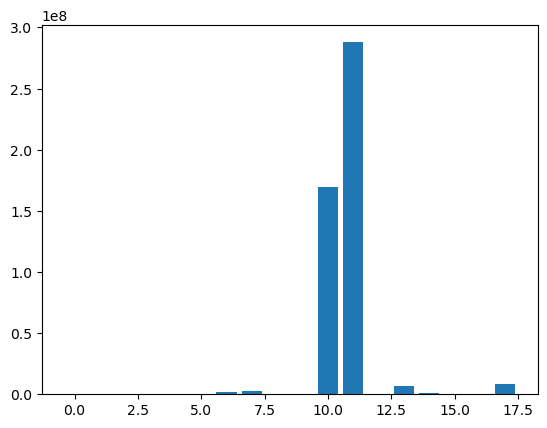

In [24]:
fs_chi2 = SelectKBest(score_func=chi2, k=9)
fs_chi2.fit(X_train_res, y_train_res)
X_train_chi2 = fs_chi2.transform(X_train_res)
X_test_chi2 = fs_chi2.transform(X_test)

for i in range(len(fs_chi2.scores_)):
	print('Feature (%d) %s: %f' % (i, fs_chi2.feature_names_in_[i], fs_chi2.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs_chi2.scores_))], fs_chi2.scores_)
plt.show()

In [25]:
fs_chi2.get_feature_names_out()

array(['ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'CRS_DEP_TIME',
       'DEP_TIME', 'CARRIER_DELAY', 'WEATHER_DELAY',
       'LATE_AIRCRAFT_DELAY'], dtype=object)

## Mutual Information Feature Selection

In [26]:
df_mifs = pd.concat([X_train_res, y_train_res], axis = 1)
rand_samp = df_mifs.sample(n=10**6, axis = 0)
rand_samp

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,CRS_DEP_TIME,DEP_TIME,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DEP_DEL15
11925022,18.0,3.0,11.0,17.0,5.0,1.0,192.0,77.0,513.0,125.0,424.0,426.0,0.0,0.0,0.0,21.0,0.0,0.0,0
5447060,2.0,3.0,10.0,0.0,1.0,7.0,816.0,85.0,87.0,37.0,1104.0,1104.0,0.0,0.0,0.0,21.0,0.0,0.0,0
88264842,19.0,2.0,6.0,27.0,3.0,27.0,822.0,85.0,149.0,66.0,819.0,1204.0,0.0,1.0,0.0,22.0,0.0,0.0,1
89874913,2.0,0.0,2.0,10.0,4.0,24.0,200.0,78.0,76.0,34.0,1113.0,1192.0,0.0,0.0,0.0,22.0,0.0,0.0,1
54682587,2.0,0.0,2.0,28.0,1.0,21.0,532.0,77.0,242.0,96.0,1284.0,1307.0,0.0,1.0,0.0,22.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8701019,1.0,3.0,10.0,9.0,2.0,1.0,774.0,270.0,1094.0,246.0,1214.0,1217.0,0.0,0.0,0.0,21.0,0.0,0.0,0
77922656,6.0,1.0,5.0,17.0,3.0,9.0,620.0,220.0,616.0,188.0,764.0,786.0,0.0,0.0,0.0,22.0,0.0,1.0,1
3526269,15.0,3.0,11.0,23.0,0.0,20.0,822.0,85.0,684.0,237.0,493.0,487.0,0.0,0.0,0.0,21.0,0.0,0.0,0
84033088,5.0,1.0,5.0,28.0,6.0,18.0,330.0,27.0,314.0,29.0,707.0,732.0,0.0,0.0,0.0,21.0,0.0,0.0,1


In [27]:
X_train_mifs = rand_samp.drop(columns=['DEP_DEL15'])
y_train_mifs = rand_samp['DEP_DEL15']

Feature (0) YEAR: 0.009253
Feature (1) QUARTER: 0.025498
Feature (2) MONTH: 0.013996
Feature (3) DAY_OF_MONTH: 0.003725
Feature (4) DAY_OF_WEEK: 0.020009
Feature (5) OP_CARRIER_AIRLINE_ID: 0.011578
Feature (6) ORIGIN_AIRPORT_SEQ_ID: 0.008189
Feature (7) ORIGIN_CITY_MARKET_ID: 0.007756
Feature (8) DEST_AIRPORT_SEQ_ID: 0.006081
Feature (9) DEST_CITY_MARKET_ID: 0.006452
Feature (10) CRS_DEP_TIME: 0.031098
Feature (11) DEP_TIME: 0.061224
Feature (12) CANCELLED: 0.000000
Feature (13) CARRIER_DELAY: 0.192608
Feature (14) WEATHER_DELAY: 0.019430
Feature (15) NAS_DELAY: 0.140075
Feature (16) SECURITY_DELAY: 0.001796
Feature (17) LATE_AIRCRAFT_DELAY: 0.223624


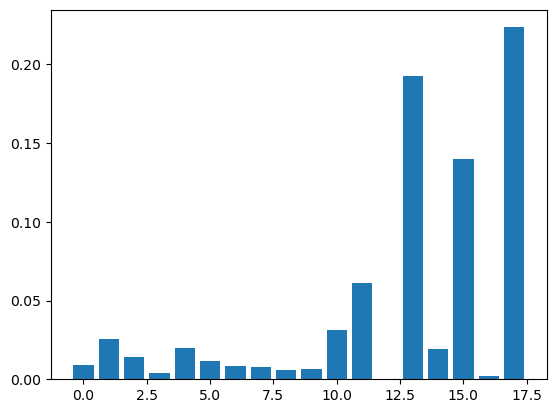

In [28]:
fs_mutual_info_classif = SelectKBest(score_func=mutual_info_classif, k=9)
fs_mutual_info_classif.fit(X_train_mifs, y_train_mifs)
fs_mutual_info_classif.transform(X_train_mifs)

for i in range(len(fs_mutual_info_classif.scores_)):
	print('Feature (%d) %s: %f' % (i, fs_mutual_info_classif.feature_names_in_[i], fs_mutual_info_classif.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs_mutual_info_classif.scores_))], fs_mutual_info_classif.scores_)
plt.show()

In [29]:
fs_mutual_info_classif.get_feature_names_out()

array(['QUARTER', 'MONTH', 'DAY_OF_WEEK', 'CRS_DEP_TIME', 'DEP_TIME',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'LATE_AIRCRAFT_DELAY'], dtype=object)

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)

# Evaluate the model
accuracy_before = rf.score(X_test, y_test)
print(f'Accuracy before feature selection: {accuracy_before:.2f}')

KeyboardInterrupt: 

In [ ]:
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Rank features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Select top N features (example selecting top 10 features)
top_features = feature_importance_df['Feature'][:10].values
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

In [ ]:
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, y_train)

# Evaluate the model
accuracy_after = rf_selected.score(X_test_selected, y_test)
print(f'Accuracy after feature selection: {accuracy_after:.2f}')

## Test Model with all features

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='newton-cholesky')
model.fit(X_train_res, y_train_res)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

## Test Model Using Chi-Squared Features

In [ ]:
model = LogisticRegression(solver='newton-cholesky')
model.fit(X_train_res[fs_chi2.get_feature_names_out()], y_train_res)
# evaluate the model
yhat = model.predict(X_test[fs_chi2.get_feature_names_out()])
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

## Test Model Using Mutual Information Features

In [ ]:
model = LogisticRegression(solver='newton-cholesky')
model.fit(X_train_res[fs_mutual_info_classif.get_feature_names_out()], y_train_res)
# evaluate the model
yhat = model.predict(X_test[fs_mutual_info_classif.get_feature_names_out()])
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))